## Machine Learning 프로젝트 수행을 위한 코드 구조화

`(클러스터링 Task)`

- ML project를 위해서 사용하는 템플릿 코드를 만듭니다.

1. **필요한 라이브러리와 데이터를 불러옵니다.**


2. **EDA를 수행합니다.** 이 때 EDA의 목적은 풀어야하는 문제를 위해서 수행됩니다.


3. **전처리를 수행합니다.** 이 때 중요한건 **feature engineering**을 어떻게 하느냐 입니다.


4. **학습을 진행합니다.** 어떤 모델을 사용하여 학습할지 정합니다. 클러스터링 모델은 상황에 따라 여러가지 변수가 있으니, EDA 결과를 잘 보고 모델을 고르시면 됩니다.


5. **정량 평가을 진행합니다.** elbow method, silhouette score등을 사용해서 optimal number of cluster나, threshold를 찾아보세요.


6. **정성 평가를 진행합니다.** 분석 결과의 시각화된 정보나, 클러스터별 요약 정보를 정의해서 확인해보세요. 클러스터링은 결과 해석이 무엇보다 중요합니다!

비슷한 패턴을 보이는 역별로 clustering해보자!

### 1. 데이터 불러오기 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 한글 폰트 사용하기 위한 코드

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
#확인
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'NanumBarun' in f.name]

[('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'),
 ('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf')]

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 1.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
# 데이터와 필요한 라이브러리를 불러오세요.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/drive/MyDrive/이어드림스쿨/Today_I_learn/5월/Part4. 머신러닝/data/2021년 11월  교통카드 통계자료.xls',sheet_name='지하철 노선별 역별 이용현황')
df.head()

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2021-11,1호선,1,서울역,"1,266,869","1,215,592",2021-12-03 10:48:55
1,2021-11,1호선,10,동묘앞,"256,802","266,628",2021-12-03 10:48:55
2,2021-11,1호선,2,시청,"588,726","600,203",2021-12-03 10:48:55
3,2021-11,1호선,3,종각,"916,775","891,865",2021-12-03 10:48:55
4,2021-11,1호선,4,종로3가,"706,035","651,770",2021-12-03 10:48:55


### 2. EDA

- 데이터에서 찾아야 하는 기초적인 내용들을 확인합니다.

- 클러스터링에서는 데이터 단위(row)를 잘 정의하는 것이 제일 중요합니다. Customer segmentation할 때를 떠올려보세요.


- class imbalance, target distribution, outlier, correlation을 확인합니다.

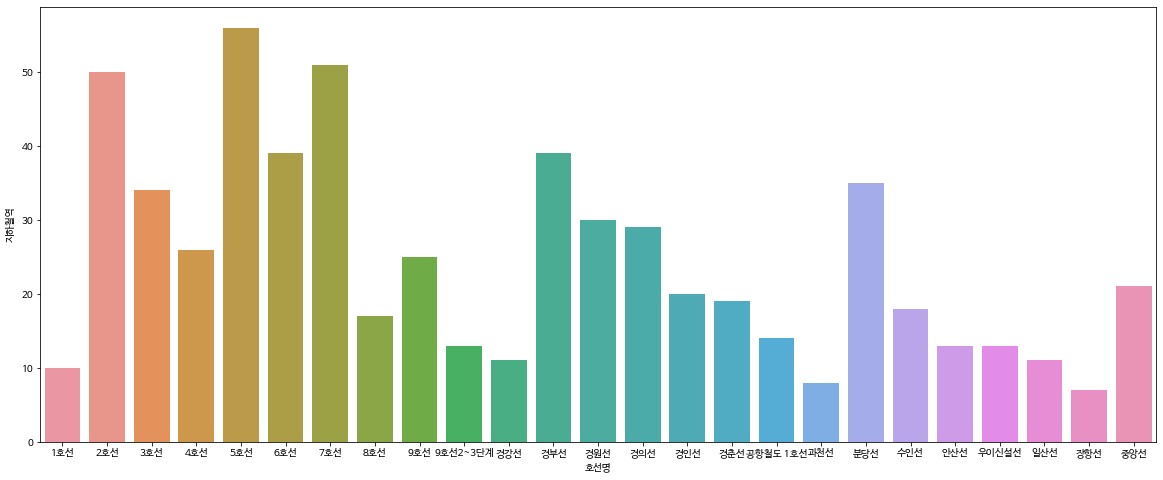

In [ ]:
# EDA를 수행합니다.
a = df.groupby('호선명').count()

plt.figure(figsize=(20,8))
sns.barplot(data=a, x=a.index, y=a.지하철역)

In [ ]:
df.head()

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2021-11,1호선,1,서울역,"1,266,869","1,215,592",2021-12-03 10:48:55
1,2021-11,1호선,10,동묘앞,"256,802","266,628",2021-12-03 10:48:55
2,2021-11,1호선,2,시청,"588,726","600,203",2021-12-03 10:48:55
3,2021-11,1호선,3,종각,"916,775","891,865",2021-12-03 10:48:55
4,2021-11,1호선,4,종로3가,"706,035","651,770",2021-12-03 10:48:55


In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x = df.지하철역, hue=(df.승차승객수, df.하차승객수))
plt.show()

TypeError: ignored

<Figure size 720x576 with 0 Axes>

### 3. 전처리

#### 결측치 처리

In [ ]:
# 결측치가 있는 column


In [ ]:
# 중복정보가 있는 column 제거하기 위해 상관계수를 확인해봅니다.
correlated_features = 

#### 다중공선성 처리

In [ ]:
# 상관계수가 threshold(e.g. 0.8)를 넘기는 feature들을 제거합니다.
threshold = 

#### Encoding Categorical Features

In [ ]:
# dtype이 object인 변수들 처리.


#### feature extraction

- 차원의 저주를 해결하거나, 데이터의 feature 조합을 이용하는 새로운 feature를 생성할 때, PCA를 사용합니다.

- 분석에 사용할 feature를 선택하는 과정도 포함합니다.

In [ ]:
# PCA 적용
from sklearn.decomposition import PCA

if feature_reducing:
    pca = PCA(n_components=0.9) # PCA(n_components=6)
    pca_data = pca.fit_transform(X)

### 4. 학습하기

- 데이터가 많다면 KMeans나 MiniBatchKMeans를 추천합니다.

- 데이터가 적은데 성능을 높이고 싶다면 SpectralClustering을 추천합니다.

- 데이터가 적은데, 클러스터 개수를 적절하게 고르지 못하겠다면 AgglomerativeClustering이나 DBSCAN을 추천합니다.


**[K-Means]**

- Elbow method를 이용하여 최적의 K값을 찾아보세요.


- sparse한 특징을 가지는 데이터를 클러스터링 하기 위해서는 어떤 기법을 사용해야 할까요?


- 클러스터링 결과를 시각화해보고, 실루엣 지수도 계산해봅시다.



**[Hierarchical Clustering]**

- 클러스터 개수를 4로 지정하고, linkage와 affinity를 바꿔가면서 실험해보세요.


- 어떤 linkage와 affinity를 쓸지 고민하려면, 어떤 방법을 사용해보면 좋을까요?


- dendrogram을 그려보세요. 결과가 잘 나왔나요?



**[DBSCAN]**

- MinPts와 Eps를 잘 조절해보세요. 밀도를 알맞게 조절하는게 제일 중요합니다.


- Outlier로 나온 데이터들은 어떻게 하는 것이 좋을까요?



**[Spectral Clustering]**

- 클러스터 개수를 K-means와 같게 지정하고, K-means와 성능을 비교해보세요.


- n_components는 몇 차원 공간으로 embedding할지를 정합니다. 5, 10, 20을 테스트해보세요. (무조건 이게 좋다는건 아닙니다.)


In [ ]:
# 사용할 클러스터링 모델을 불러와서 학습시켜 봅니다.


### 5. 정량 평가

- elbow method, perplexity, silhouette score 등 다양한 평가 지표를 찾아서 사용해보세요!

In [ ]:
# optimal K는 어떻게 찾을까요?


### 6. 정성 평가

- 결과를 해석하는 것이 unsupervised learning에서 굉장히 중요합니다.

- 클러스터링 결과를 시각화해보세요. (tSNE)

- 만들어진 클러스터 별 요약 정보를 확인해보세요.

- 우리의 분석 결과가 reasonable한가요?

In [ ]:
# 시각화
from sklearn.manifold TSNE

tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(X)



In [ ]:
# 클러스터 별 요약정보 생성 및 출력
